# Capstone Project: Exploratory Data Analysis - Inferential Statistics

Capstone Project #2: Yelp Sentiment Analysis 
Springboard -- Data Science Career Program
Inferential Statistics -- July 2020
By Kevin Cole

This notebook explores questions posed with applications of statistics. 



- Initial Proposal ** Insert links here***
- Data Wrangling
- Data Story 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pickle
import timeit
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

# Questions Posed

- Is there a statistical significance to the difference in mean review length observed between good and bad ratings?
- Is there a statistical significance to the difference in mean review length observed between open and closed restaurants?
- Is there a statistical significance to the difference in mean rating observed between open and closed restaurants?


In [2]:
reviews = pickle.load( open( "restaurant_reviews_cleaned.pkl", "rb" ) )

In [3]:
# Bootstrapping tools

# For reproducability
np.random.seed(42)

N_rep = 10000

def bootstrap_replicate_1d(data, func):
    """Generate single bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def create_bs_reps_array(data, func, size=1):
    """Creates an array of size input creating bootstrap replicates of function statistic."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [4]:
#  Data Subsetting
closed_restaurants = reviews[reviews.is_open == 0]
open_restaurants = reviews[reviews.is_open ==1]
closed_bad = closed_restaurants[closed_restaurants.good_bad == 'Bad']
open_bad = open_restaurants[open_restaurants.good_bad == 'Bad']
good_reviews = reviews[reviews.good_bad == 'Good']
bad_reviews = reviews[reviews.good_bad == 'Bad']

# Is there a statistical significance to the difference in mean review length observed between good ratings and bad ratings?

# Hypothesis - Good/Bad Review length

Null Hypothesis: The mean review length is equal between restaurants with good ratings and those with bad ratings. Their difference is zero. <br> Alternative Hypothesis: The difference in mean length of reviews of open vs. closed restaurants is nonzero. 

In [5]:
good_mean_length = good_reviews.length.mean()
bad_mean_length = bad_reviews.length.mean()
combined_mean = reviews.loc[reviews.stars !=3 ].length.mean()
observed_difference = bad_reviews.length.mean()-good_reviews.length.mean()

print('Mean review length for good ratings: ' + str(good_mean_length))
print('Mean review length for bad ratings: ' + str(bad_mean_length))
print('')
print('The observed difference in means is ' + str(round(observed_difference)) +
      ' and we are testing to determine if this difference is significant.')

Mean review length for good ratings: 322.3785087166866
Mean review length for bad ratings: 410.8125378356613

The observed difference in means is 88 and we are testing to determine if this difference is significant.


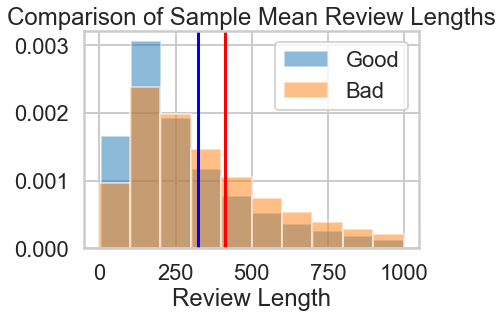

In [6]:
# Creating histogram of review lengths over the two populations
plt.hist(good_reviews.length[good_reviews.length<1000], density=True, alpha=0.5, label='Good')
plt.hist(bad_reviews.length[bad_reviews.length<1000], density=True, alpha=0.5, label='Bad')
plt.axvline(good_mean_length ,color='b')
plt.axvline(bad_mean_length ,color='r')
plt.legend()
plt.xlabel('Review Length')
plt.title('Comparison of Sample Mean Review Lengths')
plt.show()

In [7]:
# Timing start
start_time = timeit.default_timer()

# Creating shifted charges arrays
good_shifted = good_reviews.length - good_mean_length + combined_mean
bad_shifted = bad_reviews.length - bad_mean_length + combined_mean

print('Shifted Complete: ' + str(round((timeit.default_timer() - start_time))/60) + ' minutes')

# Creating bootstrap samples
bs_good_mean = create_bs_reps_array(good_shifted, np.mean, size=10000)
bs_bad_mean = create_bs_reps_array(bad_shifted, np.mean, size=10000)

print('Bootstrap Complete: ' + str(round((timeit.default_timer() - start_time)/60)) + ' minutes')

# Bootstraped replicates of difference of means
bs_difference = bs_good_mean - bs_bad_mean

print('Replicates Complete: ' + str(round((timeit.default_timer() - start_time)/60)) + ' minutes')

# Find probablity of events at least as extreme as observed
p = np.sum(bs_difference >= (bad_mean_length-good_mean_length)) / len(bs_difference)
print('p-value =', p)

# Elapsed time calculation
elapsed = timeit.default_timer() - start_time
print('All Complete: ' + str(round(elapsed/60)) + ' minutes')


Shifted Complete: 0.0 minutes
Bootstrap Complete: 29 minutes
Replicates Complete: 29 minutes
p-value = 0.0
All Complete: 29 minutes


In [8]:
# Find probablity of events at least as extreme as observed
p = np.sum(bs_difference >= (bad_mean_length-good_mean_length)) / len(bs_difference)
print('p-value =', p)

p-value = 0.0


# Is there a statistical significance to the difference in mean review length observed between open and closed restaurants?

# Hypothesis - Open/Closed Length

Null Hypothesis: The mean length of reviews is equal between open and closed restaurants. Their difference is zero. <br> Alternative Hypothesis: The difference between the mean length of reviews of open vs. closed restaurants is nonzero. 

In [9]:
open_mean = open_restaurants.length.mean()
closed_mean = closed_restaurants.length.mean()
combined_mean = reviews.length.mean()
observed_difference = closed_restaurants.length.mean()-open_restaurants.length.mean()

print('Mean review length for open restaurants: ' + str(open_mean))
print('Mean review length for closed restaurants: ' + str(closed_mean))
print('')
print('The observed difference in means is ' + str(round(observed_difference)) +
      ' and we are testing to determine if this difference is significant.')

Mean review length for open restaurants: 345.7075372289648
Mean review length for closed restaurants: 397.2129685831337

The observed difference in means is 52 and we are testing to determine if this difference is significant.


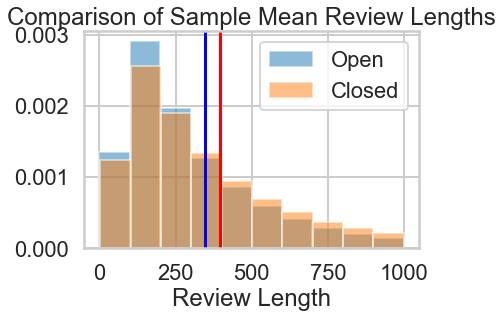

In [10]:
# Creating histogram of review lengths over the two populations
plt.hist(open_restaurants.length[open_restaurants.length<1000], density=True, alpha=0.5, label='Open')
plt.hist(closed_restaurants.length[closed_restaurants.length<1000], density=True, alpha=0.5, label='Closed')
plt.axvline(open_mean ,color='b')
plt.axvline(closed_mean ,color='r')
plt.legend()
plt.xlabel('Review Length')
plt.title('Comparison of Sample Mean Review Lengths')
plt.show()

In [13]:
# Timing start
start_time = timeit.default_timer()

# Creating shifted charges arrays
open_shifted = open_restaurants.length - open_mean + combined_mean
closed_shifted = closed_restaurants.length - closed_mean + combined_mean

print('Shifted Complete: ' + str(round((timeit.default_timer() - start_time))/60) + ' minutes')

# Creating bootstrap samples
bs_open_mean = create_bs_reps_array(open_shifted, np.mean, size=10000)
bs_closed_mean = create_bs_reps_array(closed_shifted, np.mean, size=10000)

print('Bootstrap Complete: ' + str(round((timeit.default_timer() - start_time)/60)) + ' minutes')

# Bootstraped replicates of difference of means
bs_difference = bs_open_mean - bs_closed_mean

print('Replicates Complete: ' + str(round((timeit.default_timer() - start_time)/60)) + ' minutes')

# Find probablity of events at least as extreme as observed
p = np.sum(bs_difference >= (closed_mean-open_mean)) / len(bs_difference)
print('p-value =', p)

# Elapsed time calculation
elapsed = timeit.default_timer() - start_time
print('All Complete: ' + str(round(elapsed/60)) + ' minutes')


Shifted Complete: 0.0 minutes
Bootstrap Complete: 37 minutes
Replicates Complete: 37 minutes
p-value = 0.0
All Complete: 37 minutes


In [14]:
# Find probablity of events at least as extreme as observed
p = np.sum(bs_difference >= (closed_mean-open_mean)) / len(bs_difference)
print('p-value =', p)

p-value = 0.0


# Results - Open/Closed Review Length

With the mean shifted data, there were no occurances of mean differences at least extreme as observed. We reject the null hypothosis that the means are equal based on what we observed and conclude that the difference observed is statistically significant. 

# Is there a statistical significance to the difference in mean rating observed between open and closed restaurants?

# Hypothesis - Open/Closed Ratings

We can see an observed difference in mean rating of open restaurants and closed restaurants. 

Null Hypothesis: The means of the two populations are equal; mean rating for open restaurants minus mean rating for closed restaurants is zero. 
Alternative Hypothesis: The mean rating for open restaurants minus mean rating for closed restaurants is non-zero. 

In [15]:
open_mean_rating = open_restaurants.stars.mean()
closed_mean_rating = closed_restaurants.stars.mean()
observed_mean_difference = open_mean_rating - closed_mean_rating
combined_mean_rating = reviews.stars.mean()

print('Mean rating for open restaurants: ' + str(open_mean_rating))
print('Mean rating for closed restaurants: ' + str(closed_mean_rating))
print('')
print('The observed difference in means is ' + str(observed_mean_difference) +
      ' and we are testing to determine if this difference is significant.')

Mean rating for open restaurants: 3.7602575455554073
Mean rating for closed restaurants: 3.579607696438376

The observed difference in means is 0.1806498491170312 and we are testing to determine if this difference is significant.


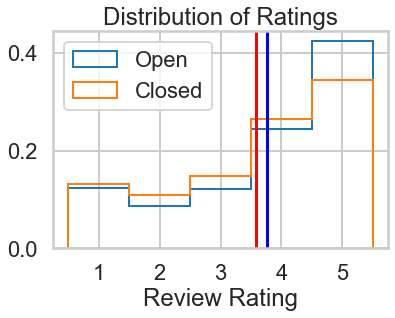

In [16]:
# Creating histogram of ratings over the two populations
plt.hist(open_restaurants.stars, bins=[.5,1.5,2.5,3.5,4.5,5.5], align='mid', histtype='step',
         density=True, label='Open')
plt.hist(closed_restaurants.stars, bins=[.5,1.5,2.5,3.5,4.5,5.5], align='mid', histtype='step',
         density=True, label='Closed')
plt.axvline(open_mean_rating ,color='b')
plt.axvline(closed_mean_rating ,color='r')
plt.legend()
plt.xlabel('Review Rating')
plt.title('Distribution of Ratings')
plt.xticks([1,2,3,4,5])
plt.show()

In [17]:
# Creating shifted charges arrays
open_shifted = open_restaurants.stars - open_mean_rating + combined_mean_rating
closed_shifted = closed_restaurants.stars - closed_mean_rating + combined_mean_rating

In [18]:
# Timing start
start_time = timeit.default_timer()

# Creating bootstrap samples
bs_open_mean = create_bs_reps_array(open_shifted, np.mean, size=10000)
bs_closed_mean = create_bs_reps_array(closed_shifted, np.mean, size=10000)

# Bootstraped replicates of difference of means
bs_difference = bs_open_mean - bs_closed_mean

print('Replicates Complete: ' + str(round((timeit.default_timer() - start_time)/60)) + ' minutes')

Replicates Complete: 36 minutes


In [19]:
# Find probablity of events at least as extreme as observed
p = np.sum(bs_difference >= (open_mean_rating-closed_mean_rating)) / len(bs_difference)
print('p-value =', p)

p-value = 0.0


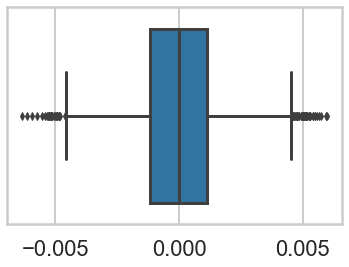

In [20]:
sns.boxplot(bs_difference)
plt.show()

# Results - Open/Closed Ratings 

With the mean shifted data, there were no occurrences of mean differences at least extreme as observed. We reject the null hypothesis that the means are equal based on what we observed and conclude that the difference in Rating between open and closed restaurants is statistically significant. 